# 1. Packages

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Read Dataset

In [10]:
dataset = pd.read_csv("./data/heart_disease_uci.csv", sep = ",", header = 0)
dataset.head()

# DF of sick and healthy
sick = dataset[dataset["target"] > 0]
healthy = dataset[dataset["target"] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


# 3. Data Interpretation
Averages for each group

In [52]:
max_len = max(len(column) for column in sick.columns)
print("\t\t Sick \t\t Healthy")
for column, par_sick, par_healthy in zip(sick.columns, sick.mean(axis = 0), healthy.mean(axis = 0)):
    print("\t".join(word.ljust(max_len) for word in [column,"{0:.2f}".format(par_sick),"{0:.2f}".format(par_healthy)]))
    

		 Sick 		 Healthy
age     	56.63   	52.59   
sex     	0.82    	0.56    
cp      	3.59    	2.79    
trestbps	134.57  	129.25  
chol    	251.47  	242.64  
fbs     	0.16    	0.14    
restecg 	1.17    	0.84    
thalach 	139.26  	158.38  
exang   	0.55    	0.14    
oldpeak 	1.57    	0.59    
slope   	1.83    	1.41    
ca      	1.06    	0.10    
thal    	5.73    	3.72    
target  	2.04    	0.00    


## Differences:
1. Thalach - 139 compare to 158 in healthy patients
1. ca - 1 compare to 0 
1. thal - 5 compare to 3

## Histogram & Box Plot

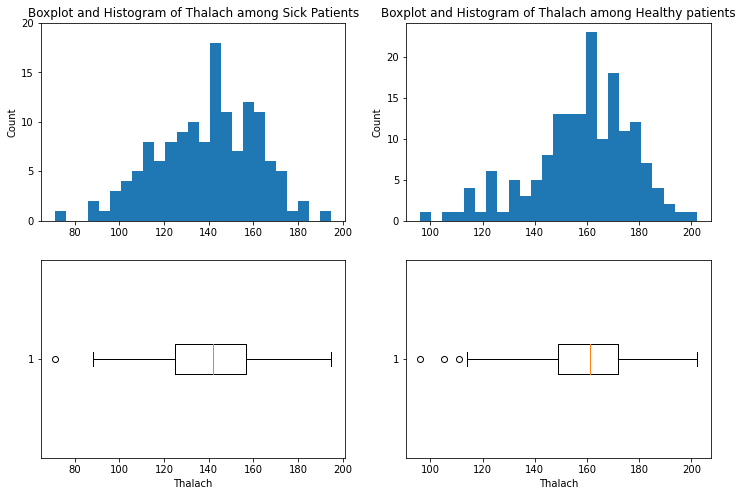

In [135]:
fig = plt.figure(figsize = (12, 8))

#--- Your code starts here

x_axis = fig.add_subplot(2, 2, 1) ## (figure 1 in 2x1 grid)
x_axis.hist(sick["thalach"], bins = 25)

plt.ylabel("Count")
plt.title("Boxplot and Histogram of Thalach among Sick Patients")
plt.yticks(range(0,25,5))
y_axis = fig.add_subplot(2, 2,3)
y_axis.boxplot(sick["thalach"], vert=False)
_ = plt.xlabel("Thalach")

x_axis = fig.add_subplot(2, 2, 2) 
x_axis.hist(healthy["thalach"], bins = 25)

plt.ylabel("Count")
plt.title("Boxplot and Histogram of Thalach among Healthy patients")

y_axis = fig.add_subplot(2, 2, 4)
y_axis.boxplot(healthy["thalach"], vert=False)
_ = plt.xlabel("Thalach")

#--- Your code ends here

<AxesSubplot:title={'center':'Thal Values among Sick and Healthy Patients'}, xlabel='Thal Values', ylabel='Count'>

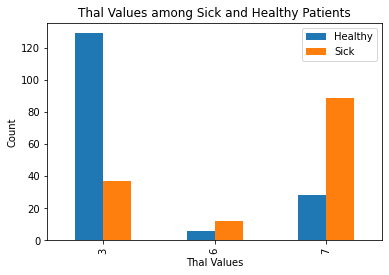

In [125]:
sick_thal = [len(sick[(sick["thal"] == i)]) for i in (3,6,7)]
healthy_thal = [len(healthy[(healthy["thal"] == i)]) for i in (3,6,7)]

df = pd.DataFrame({"Healthy":healthy_thal,"Sick":sick_thal,}, index = [3,6,7], columns = ['Healthy','Sick'])
df.plot(kind = "bar",
        title = "Thal Values among Sick and Healthy Patients",
        ylabel = "Count",
        xlabel = "Thal Values")

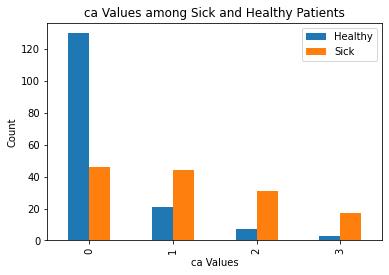

In [154]:
sick_ca = [len(sick[(sick["ca"] == i)]) for i in range(4)]
healthy_ca = [len(healthy[(healthy["ca"] == i)]) for i in range(4)]

df = pd.DataFrame({"Healthy":healthy_ca,"Sick":sick_ca,}, index = list(range(4)), columns = ['Healthy','Sick'])
ax = df.plot(kind = "bar", 
             title = "ca Values among Sick and Healthy Patients",
             ylabel = "Count",
             xlabel = "ca Values")


### Findings so far
1. Thalach - There is a minor difference between healthy and sick patients.
1. Thal - the value 3 which is indicates Normal is more common among healthy patients and the value 7 which means "reversible defect" is more common among sick patients.
1. ca - Number of major vessels (0-3) colored by flourosopy. According to the bar plot above, healthy patients are more likley to have 0. In the other values (1,2,3) there are also a few healthy patients, but their numbers are less than the sick patients. 

## Cholesterol
Healthy < 200 mg/dl

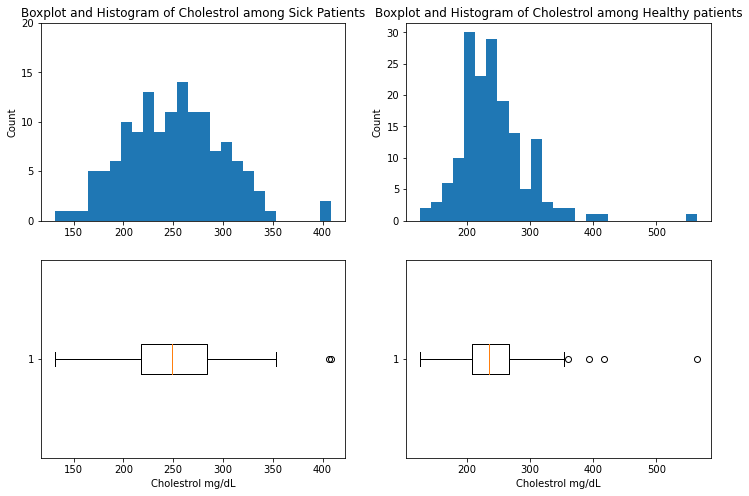

In [155]:
fig = plt.figure(figsize = (12, 8))

#--- Your code starts here

x_axis = fig.add_subplot(2, 2, 1) ## (figure 1 in 2x1 grid)
x_axis.hist(sick["chol"], bins = 25)

plt.ylabel("Count")
plt.title("Boxplot and Histogram of Cholestrol among Sick Patients")
plt.yticks(range(0,25,5))
y_axis = fig.add_subplot(2, 2,3)
y_axis.boxplot(sick["chol"], vert=False)
_ = plt.xlabel("Cholestrol mg/dL")

x_axis = fig.add_subplot(2, 2, 2) 
x_axis.hist(healthy["chol"], bins = 25)

plt.ylabel("Count")
plt.title("Boxplot and Histogram of Cholestrol among Healthy patients")

y_axis = fig.add_subplot(2, 2, 4)
y_axis.boxplot(healthy["chol"], vert=False)
_ = plt.xlabel("Cholestrol mg/dL")

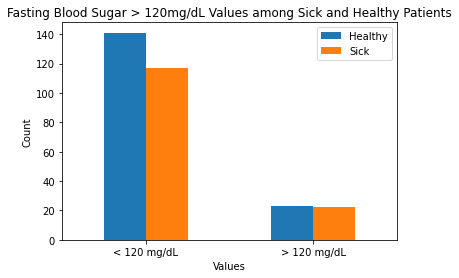

In [156]:
sick_fbs = [len(sick[(sick["fbs"] == i)]) for i in range(2)]
healthy_fbs = [len(healthy[(healthy["fbs"] == i)]) for i in range(2)]

df = pd.DataFrame({"Healthy":healthy_fbs,"Sick":sick_fbs,}, index = ["< 120 mg/dL", "> 120 mg/dL"], columns = ['Healthy','Sick'])
ax = df.plot(kind = "bar", 
             title = "Fasting Blood Sugar > 120mg/dL Values among Sick and Healthy Patients",
             ylabel = "Count",
             xlabel = "Values",
             rot = 0)

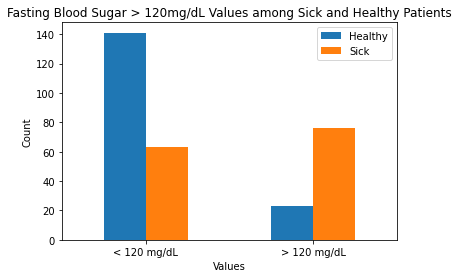

In [157]:
sick_exang = [len(sick[(sick["exang"] == i)]) for i in range(2)]
healthy_exang = [len(healthy[(healthy["exang"] == i)]) for i in range(2)]
df = pd.DataFrame({"Healthy":healthy_exang,"Sick":sick_exang,}, index = ["< 120 mg/dL", "> 120 mg/dL"], columns = ['Healthy','Sick'])
ax = df.plot(kind = "bar", 
             title = "Fasting Blood Sugar > 120mg/dL Values among Sick and Healthy Patients",
             ylabel = "Count",
             xlabel = "Values",
             rot = 0)